In [20]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')

In [21]:
print(torch.__version__)

2.4.1


In [22]:
device = torch.device("mps")

In [23]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')

In [24]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [25]:
#target - fare amount
#numerical long,lat,passenger count
#object - datetime

### Distance extraction from long and lats

In [26]:
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)

    return d
    

In [27]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [28]:
df['distance_in_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [29]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


<Axes: xlabel='passenger_count', ylabel='count'>

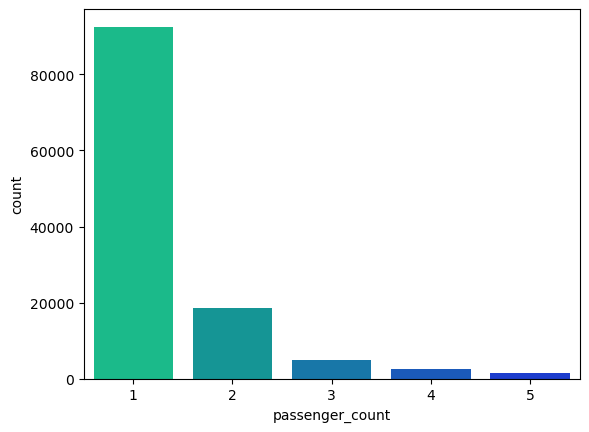

In [30]:
#extracting from datetime object
sns.countplot(x='passenger_count',data=df,palette='winter_r')

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

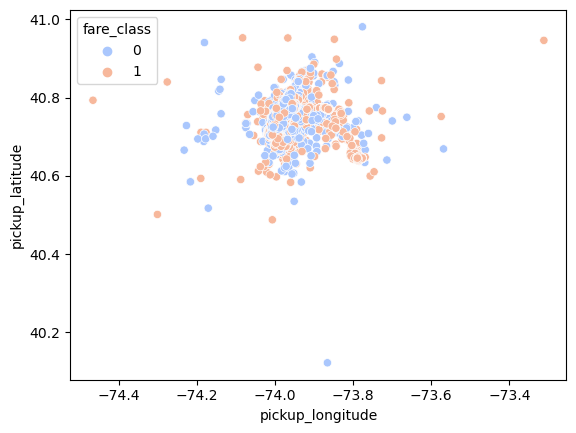

In [31]:
sns.scatterplot(x='pickup_longitude',y='pickup_latitude',data=df,hue='fare_class',palette='coolwarm')

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

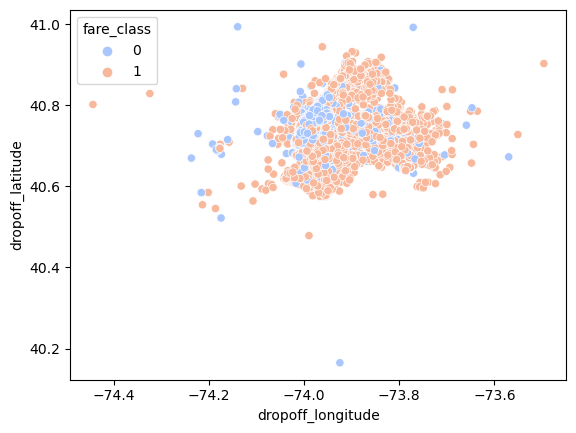

In [32]:
sns.scatterplot(x='dropoff_longitude',y='dropoff_latitude',data=df,hue='fare_class',palette='coolwarm')

### Datetime

In [33]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [34]:
#change time zone from UTC to EDT
df['datetime'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [35]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,datetime
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00


In [36]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [40]:
#extract hours, weekday,am or pm,day of month,minutes
df['Hours'] = df['datetime'].apply(lambda date: date.hour)

In [41]:
df['Minutes'] = df['datetime'].apply(lambda date:date.minute)

In [42]:
df['Weekday'] = df['datetime'].apply(lambda date : date.day_of_week).replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})

In [43]:
df['AM_PM'] = df['Hours'].apply(lambda x : "AM" if x < 12 else "PM")

In [46]:
df['Date'] = df['datetime'].apply(lambda date: date.day)

In [47]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,datetime,Hours,Minutes,Weekday,AM_PM,Date
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,17,Mon,AM,19
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,43,Sat,AM,17
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,23,Sat,AM,17
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,25,Sun,PM,11
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,19,Fri,PM,16


### Divide into continous and categorical vars

In [49]:
cat_cols = ['Hours','Minutes', 'Weekday', 'AM_PM','Date']
num_cols = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count','distance_in_km']

In [50]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [54]:
#one liner
cats = np.stack([df[col].cat.codes for col in cat_cols],axis=1)
conts = np.stack([df[col].values for col in num_cols],axis=1)

In [58]:
cats = torch.tensor(cats,dtype=torch.int64)

In [59]:
conts = torch.Tensor(conts)

In [85]:
y_col = ['fare_amount']
y = torch.Tensor(df[y_col].values)

In [86]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

### That concludes feature engineering

#### embedding sizes

In [62]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

### Create the model

In [106]:
class Model(nn.Module):

    def __init__(self,emb_szs,n_cont,out_sz,layers,p=0.4):
        super().__init__()
        #deal with catgegorical variables first
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout()
        n_emb = sum([nf for ni,nf in emb_szs])
        #deal with numerical
        self.bn_cont = nn.BatchNorm1d(n_cont)
        #calc total input 
        n_in = n_cont + n_emb
        #create layers
        layerlist = []
        #Linear() - > Relu () -> batchnorm() -> dropout()
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        #create layers attribute
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        #process cat
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        #process num
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [107]:
model = Model(emb_szs,conts.shape[1],1,[512,256,128,64,32,16,8,4],p=0.4)

In [108]:
model.to(device)

Model(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(60, 30)
    (2): Embedding(7, 4)
    (3): Embedding(2, 1)
    (4): Embedding(14, 7)
  )
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=60, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(

### Creating data

In [109]:
batch_size = len(df)
test_size = int(0.2 * batch_size)

In [110]:
#create seperate varibles for cont,and cat
cont_train = conts[:batch_size-test_size].to(device)
cont_test = conts[batch_size-test_size:].to(device)
cat_train = cats[:batch_size-test_size].to(device)
cat_test = cats[batch_size-test_size:].to(device)
y_train = y[:batch_size-test_size].to(device)
y_test = y[batch_size-test_size:].to(device)

In [111]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [112]:
num_epochs = 1500

In [113]:
losses = []

for epoch in range(num_epochs):
    y_pred = model.forward(cat_train,cont_train)
    loss = torch.sqrt(criterion(y_pred,y_train))#RMSE
    losses.append(loss.item())
    if (epoch+1)%10 == 0:
        print(f"epoch : {epoch+1}/{num_epochs} loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch : 10/1500 loss : 11.941121101379395
epoch : 20/1500 loss : 11.564379692077637
epoch : 30/1500 loss : 11.049139022827148
epoch : 40/1500 loss : 10.365620613098145
epoch : 50/1500 loss : 9.555986404418945
epoch : 60/1500 loss : 8.590399742126465
epoch : 70/1500 loss : 7.732524394989014
epoch : 80/1500 loss : 7.050650119781494
epoch : 90/1500 loss : 6.436734199523926
epoch : 100/1500 loss : 5.92186164855957
epoch : 110/1500 loss : 5.624129295349121
epoch : 120/1500 loss : 5.45546293258667
epoch : 130/1500 loss : 5.468698024749756
epoch : 140/1500 loss : 5.465408802032471
epoch : 150/1500 loss : 5.40635871887207
epoch : 160/1500 loss : 5.3714776039123535
epoch : 170/1500 loss : 5.372483253479004
epoch : 180/1500 loss : 5.33380651473999
epoch : 190/1500 loss : 5.335085391998291
epoch : 200/1500 loss : 5.326024532318115
epoch : 210/1500 loss : 5.337520599365234
epoch : 220/1500 loss : 5.284757137298584
epoch : 230/1500 loss : 5.289648532867432
epoch : 240/1500 loss : 5.273646354675293


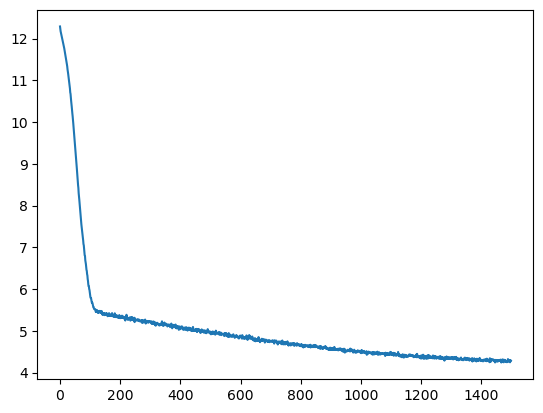

In [114]:
plt.plot(range(num_epochs),losses)

In [115]:
with torch.no_grad():
    y_eval = model.forward(cat_test,cont_test)
    loss_test = torch.sqrt(criterion(y_eval,y_test))

In [116]:
print(f"loss on test set : {loss_test}")

loss on test set : 4.5355305671691895
